In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
from pathlib import Path
import statsmodels.api as sm



import numpy as np

if "root" not in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)

sns.set_style('whitegrid')

import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})

In [54]:
df = pd.read_csv('data/treated/tshirts.csv').drop(['Unnamed: 0'], axis=1, inplace=False)

In [55]:
df

,État,Marque,Date,nom,Prix,Description,keep,Marques,Ultra fast fashion,Fast fashion,Sportswear,Premium,Designers brands & luxury
0,TRÈS BON ÉTAT,ZARA,2022-04-09,T-SHIRT ZARA,5.00,QUASI NEUF ( PORTÉ QUE QUELQUES FOIS ),True,ZARA,0,1,0,0,0
1,NEUF SANS ÉTIQUETTE,ZARA,2022-04-09,BLUSA ZARA,9.95,BLUSA DE SHEIN EN COLOR BLANCA CON UN DETALLE ...,False,ZARA,0,1,0,0,0
2,TRÈS BON ÉTAT,ZARA,2022-04-09,ZARA T-SHIRT MAAT S,2.00,BASIC ZARA T-SHIRT,True,ZARA,0,1,0,0,0
3,TRÈS BON ÉTAT,ZARA,2022-04-02,ZARA HEREN/MEN T-SHIRT MOVIE DRIVE MAAT S,2.00,MERK/BRAND: ZARA\nMAAT/SIZE: S\nCONDITIE/CONDI...,True,ZARA,0,1,0,0,0
4,TRÈS BON ÉTAT,ZARA,2022-03-23,T SHIRT ZARA,13.00,"T SHIRT TRÈS BON ÉTAT, TROP GRAND POUR MOI\nC ...",True,ZARA,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,TRÈS BON ÉTAT,CHANEL,2022-03-23,NaN,231.28,T-SHIRT CHANEL AVEC DE MINUSCULES PERLES SUR L...,True,CHANEL,0,0,0,0,1
392,TRÈS BON ÉTAT,CHANEL,2022-03-23,NaN,231.28,T-SHIRT CHANEL AVEC DE MINUSCULES PERLES SUR L...,True,CHANEL,0,0,0,0,1
393,TRÈS BON ÉTAT,YEEZY,2022-03-25,NaN,180.00,T-SHIRT THERMIQUE À MANCHES LONGUES YEEZY SEAS...,True,YEEZY,0,0,0,1,0
394,TRÈS BON ÉTAT,YEEZY,2022-03-25,NaN,180.00,T-SHIRT THERMIQUE À MANCHES LONGUES YEEZY SEAS...,True,YEEZY,0,0,0,1,0


In [56]:
#meanPrice = {'Sportswear':90, 'UltraFastFashion':20, 'FastFashion':40, 'Premium':150, 'Designers brands & luxury': 300}
meanPrice = [20, 50, 90, 150, 300]
def computeReduction(row: pd.Series):
    new_price = np.sum([row[-i]*meanPrice[-i] for i in range(1,6)]) 
    return (new_price-row['Prix'])/new_price

In [57]:
df['promo'] = df.apply(computeReduction, axis=1)

In [58]:
df.shape[0]

396

In [59]:
df = df[df.promo>0]

cat
Fashion             AxesSubplot(0.125,0.125;0.775x0.755)
FastFashion         AxesSubplot(0.125,0.125;0.775x0.755)
Luxe                AxesSubplot(0.125,0.125;0.775x0.755)
UltraFashion        AxesSubplot(0.125,0.125;0.775x0.755)
UltraFastFashion    AxesSubplot(0.125,0.125;0.775x0.755)
Name: promo, dtype: object

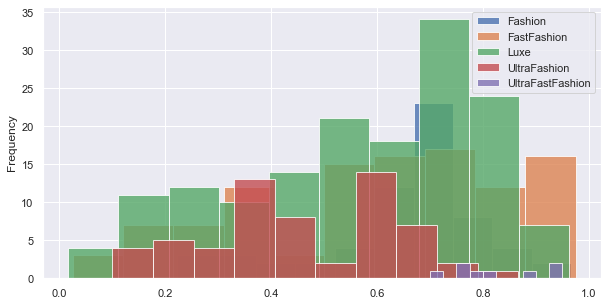

In [8]:
df.groupby(by=['cat']).promo.plot(alpha=0.8, legend=True,kind='hist')

In [9]:
df[df.cat == 'FastFashion'].promo.to_numpy()

array([0.875  , 0.825  , 0.575  , 0.375  , 0.825  , 0.75   , 0.375  ,
       0.925  , 0.75   , 0.9    , 0.675  , 0.7    , 0.925  , 0.8125 ,
       0.875  , 0.9125 , 0.75125, 0.75125, 0.7    , 0.3    , 0.75   ,
       0.375  , 0.375  , 0.75   , 0.95   , 0.5    , 0.125  , 0.25025,
       0.3    , 0.75   , 0.3    , 0.8    , 0.875  , 0.90025, 0.90025,
       0.90025, 0.1375 , 0.975  , 0.875  , 0.625  , 0.5    , 0.375  ,
       0.50025, 0.7    , 0.75   , 0.55   , 0.9625 , 0.7    , 0.125  ,
       0.67525, 0.45   , 0.2525 , 0.375  , 0.625  , 0.5    , 0.95   ,
       0.95   , 0.75   , 0.9125 , 0.6    , 0.625  , 0.675  , 0.875  ,
       0.875  , 0.25025, 0.675  , 0.675  , 0.5    , 0.425  , 0.5    ,
       0.625  , 0.1875 , 0.8625 , 0.50025, 0.05   , 0.75   , 0.7    ,
       0.7    , 0.675  , 0.125  , 0.1875 , 0.3275 , 0.9    , 0.975  ,
       0.025  , 0.9    , 0.625  , 0.675  , 0.675  , 0.375  , 0.75   ,
       0.825  , 0.375  , 0.375  , 0.5    , 0.5    , 0.325  , 0.45   ,
       0.125  , 0.6 

In [10]:
data = df[df.cat == 'Luxe'].promo.to_numpy()

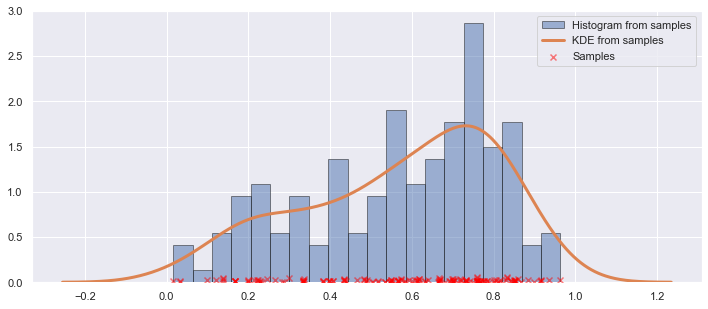

In [11]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()  
# Plot the histrogram
ax.hist(
    data,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)

# Plot the samples
ax.scatter(data,
    np.abs(np.random.randn(data.size)) / 40,
    marker="x",
    color="red",
    zorder=20,
    label="Samples",
    alpha=0.5,
)

ax.legend(loc="best")
ax.grid(True, zorder=-5)

In [12]:
df['IsLuxe'] = (df.cat == "Luxe").astype('int')
df['IsUFashion'] = (df.cat == "UltraFashion").astype('int')
#df['isFashion'] = (df.cat == "Fashion").astype('int')
df['IsFastFashion'] = (df.cat == "FastFashion").astype('int')
#df['IsUltraFastFashion'] =(df.cat == "UltraFastFashion" ).astype('int')



In [60]:
df = df.drop(['nom', 'Marque','Marques', 'Description', 'Date'], axis=1)

In [61]:
df['etat']= 1*(df['État']=='NEUF AVEC ÉTIQUETTE') + 2*(df['État']=='NEUF SANS ÉTIQUETTE') + 3*(df['État']=='TRÈS BON ÉTAT') + 4*(df['État']=='BON ÉTAT') + 5*(df['État']=='SATISFAISANT')

In [62]:
X, y  = df.drop(['État','promo', 'Prix', 'keep'], axis=1), df.promo

In [63]:
X

,Ultra fast fashion,Fast fashion,Sportswear,Premium,Designers brands & luxury,etat
0,0,1,0,0,0,3
1,0,1,0,0,0,2
2,0,1,0,0,0,3
3,0,1,0,0,0,3
4,0,1,0,0,0,3
...,...,...,...,...,...,...
389,0,0,0,1,0,3
390,0,0,0,1,0,3
391,0,0,0,0,1,3
392,0,0,0,0,1,3


In [64]:
cols = X.columns

In [36]:
import statsmodels.api as sm
exog =  sm.add_constant(X)

In [50]:
y

0      0.833333
1      0.668333
2      0.933333
3      0.933333
4      0.566667
         ...   
389    0.626667
390    0.213333
391    0.229067
392    0.229067
395    0.340000
Name: promo, Length: 363, dtype: float64

In [65]:
mod = sm.OLS(np.log(y.to_numpy()), exog=X)
res = mod.fit()


In [66]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     10.04
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.06e-09
Time:                        14:01:40   Log-Likelihood:                -269.22
No. Observations:                 372   AIC:                             550.4
Df Residuals:                     366   BIC:                             574.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ultra fast fashion           -0.5271      0.196     -2.688      0.008      -0.913      -0.142
Fast fashion                 -0.7245      0.090     -8.023      0.000      -0.902      -0.547
Sportswear                   -0.7157      0.112     -6.375      0.000      -0.936      -0.495
Premium                      -1.1238      0.103    -10.921      0.000      -1.326      -0.921
Designers brands & luxury    -0.9648      0.087    -11.069      0.000      -1.136      -0.793
etat                          0.1156      0.030      3.851      0.000       0.057       0.175
==============================================================================
Omnibus:                      224.520   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1821.582
Skew:                          -2.495   Prob(JB):                         0.00
Kurtosis:                      12.624   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En moyenne, toutes choses prises égales par ailleurs, la promotion en %  faite à un vêtement de seconde main réduit de 35%  lorsqu’il est d’une Marque de Luxe, en supposant que le prix moyen d’un tee-shirt de luxe est de 200€. 